# Loan Default case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import os

In [2]:
os.chdir("C:\\Users\\kumarvch\\Desktop\\Data_aNALYSIS\\ds Project\\House price pridiction")

In [3]:
os.getcwd()

'C:\\Users\\kumarvch\\Desktop\\Data_aNALYSIS\\ds Project\\House price pridiction'

In [4]:
data = pd.read_csv("bank-loan.csv")

In [5]:
data.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [6]:
data.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

As the categorical variables are in int64 data type we converted them to Categorical

In [7]:
data['ed'] = pd.Categorical(data['ed'])
data['employ'] = pd.Categorical(data['employ'])
data['address'] = pd.Categorical(data['address'])
data['default' ] = pd.Categorical(data['default'])

In [8]:
data.dtypes

age            int64
ed          category
employ      category
address     category
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [9]:
data.describe()

,age,income,debtinc,creddebt,othdebt
count,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,46.675294,10.171647,1.576805,3.078789
std,8.041432,38.543054,6.719441,2.125840,3.398803
min,20.000000,13.000000,0.100000,0.011696,0.045584
25%,29.000000,24.000000,5.100000,0.382176,1.045942
50%,34.000000,35.000000,8.700000,0.885091,2.003243
75%,41.000000,55.750000,13.800000,1.898440,3.903001
max,56.000000,446.000000,41.300000,20.561310,35.197500


# Missing value analysis

In [10]:
missing_values = pd.DataFrame(data.isnull().sum())

In [11]:
missing_values = (missing_values/len(data))*100
missing_values

,0
age,0.000000
ed,0.000000
employ,0.000000
address,0.000000
income,0.000000
debtinc,0.000000
creddebt,0.000000
othdebt,0.000000
default,17.647059


In [12]:
data = data.dropna()

In [13]:
data.shape

(700, 9)

# Outlier analysis

lets find the outliers in contineous numeric data

lets create a list of contineus variables

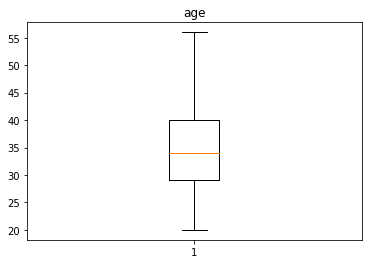

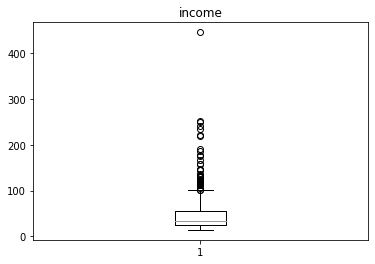

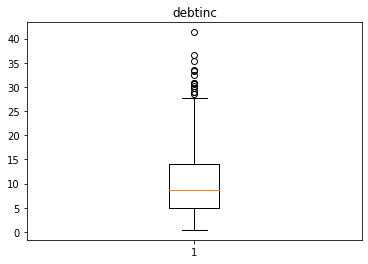

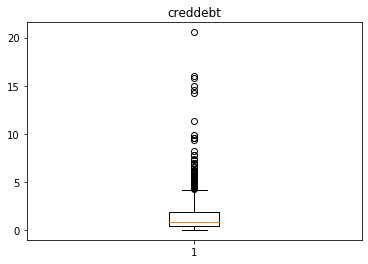

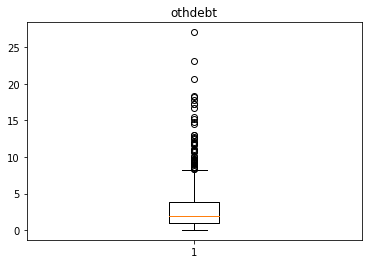

In [15]:
cnames = ['age' , 'income' ,'debtinc' , 'creddebt' ,'othdebt']
for i in cnames:
    mlp.boxplot(data[i] ,whis=1.5)
    mlp.title(i)
    mlp.show()

We can see from the above boxplot that there are outliers in our numerical data

In [16]:
cnames = ['age' , 'income' ,'debtinc' , 'creddebt' ,'othdebt']
for i in cnames:
    q25,q75 = np.percentile(data[i] , (25 , 75))
    iqr = q75 -q25
    Min = q25 - (1.5*iqr)
    Max = q75 + (1.5*iqr)
    print("The variable {} has got {} outliers and percentage of outliers is {} ".format(i,
                                                                             len((np.where((data[i] > Max) | 
                                                                                           (data[i] < Min))[0])),len((np.where((data[i] > Max) | 
                                                                                           (data[i] < Min))[0]))*100/len(data)))

The variable age has got 0 outliers and percentage of outliers is 0.0 
The variable income has got 40 outliers and percentage of outliers is 5.714285714285714 
The variable debtinc has got 14 outliers and percentage of outliers is 2.0 
The variable creddebt has got 55 outliers and percentage of outliers is 7.857142857142857 
The variable othdebt has got 48 outliers and percentage of outliers is 6.857142857142857 


In [17]:
cnames = ['age' , 'income' ,'debtinc' , 'creddebt' ,'othdebt']
for i in cnames:
    q25,q75 = np.percentile(data[i] , (25 , 75))
    iqr = q75 -q25
    Min = q25 - (1.5*iqr)
    Max = q75 + (1.5*iqr)
    data[i] = np.where(data[i] > Max , data[i].median() , data[i] )
    data[i] = np.where(data[i] < Min , data[i].median() , data[i] )

In [18]:
cnames = ['age' , 'income' ,'debtinc' , 'creddebt' ,'othdebt']
for i in cnames:
    print(i)
    q25,q75 = np.percentile(data[i] , (25 , 75))
    iqr = q75 -q25
    Min = q25 - (1.5*iqr)
    Max = q75 + (1.5*iqr)
    print(Max)
    print(Min)
    print("The variable {} has got {} outliers and percentage of outliers is {} ".format(i,
                                                                             len((np.where((data[i] > Max) | 
                                                                                           (data[i] < Min))[0])),len((np.where((data[i] > Max) | 
                                                                                           (data[i] < Min))[0]))*100/len(data)))

age
56.5
12.5
The variable age has got 0 outliers and percentage of outliers is 0.0 
income
84.0
-12.0
The variable income has got 24 outliers and percentage of outliers is 3.4285714285714284 
debtinc
26.25
-7.75
The variable debtinc has got 6 outliers and percentage of outliers is 0.8571428571428571 
creddebt
3.1633823750000003
-1.307534625
The variable creddebt has got 28 outliers and percentage of outliers is 4.0 
othdebt
6.071730125
-1.9723528750000003
The variable othdebt has got 35 outliers and percentage of outliers is 5.0 


In [19]:
from scipy.stats.mstats import winsorize

In [20]:
data['income']  = winsorize(data['income'] , (0 , 0.04))
data['debtinc'] = winsorize(data['debtinc'] , (0 , 0.01))
data['creddebt'] = winsorize(data['creddebt'] , (0 , 0.05))
data['othdebt'] = winsorize(data['othdebt'] , (0,0.05))

In [21]:
cnames = ['age' , 'income' ,'debtinc' , 'creddebt' ,'othdebt']
for i in cnames:
    q25,q75 = np.percentile(data[i] , (25 , 75))
    iqr = q75 -q25
    Min = q25 - (1.5*iqr)
    Max = q75 + (1.5*iqr)
    print("The variable {} has got {} outliers and percentage of outliers is {} ".format(i,
                                                                             len((np.where((data[i] > Max) | 
                                                                                           (data[i] < Min))[0])),len((np.where((data[i] > Max) | 
                                                                                           (data[i] < Min))[0]))*100/len(data)))

The variable age has got 0 outliers and percentage of outliers is 0.0 
The variable income has got 0 outliers and percentage of outliers is 0.0 
The variable debtinc has got 0 outliers and percentage of outliers is 0.0 
The variable creddebt has got 0 outliers and percentage of outliers is 0.0 
The variable othdebt has got 0 outliers and percentage of outliers is 0.0 


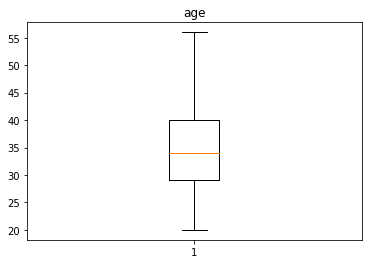

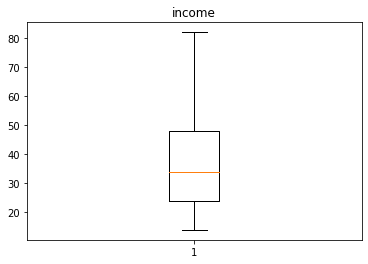

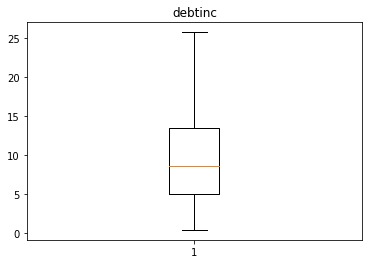

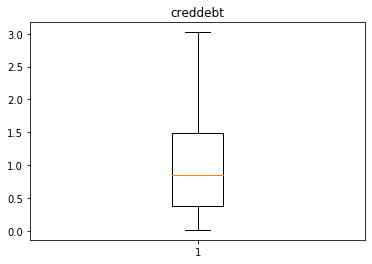

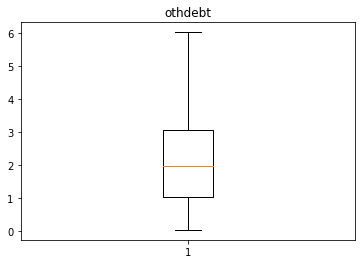

In [22]:
for i in cnames:
    mlp.boxplot(data[i] ,whis=1.5)
    mlp.title(i)
    mlp.show()

# Feature selection

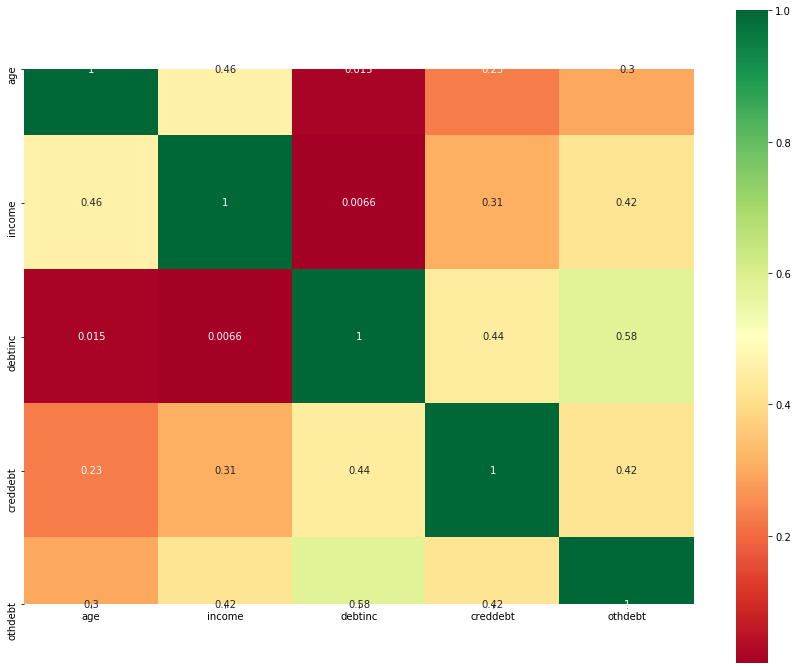

In [23]:
#lets plot the correlation plot for numeric variables.
import seaborn as sn
corr = data[cnames].corr()

mlp.figure(figsize=(15,12))
sn.heatmap(corr , square=True , annot=True, cmap="RdYlGn")

In [24]:
print(corr)

               age    income   debtinc  creddebt   othdebt
age       1.000000  0.458426  0.014866  0.230183  0.295285
income    0.458426  1.000000  0.006631  0.307984  0.420193
debtinc   0.014866  0.006631  1.000000  0.442235  0.580052
creddebt  0.230183  0.307984  0.442235  1.000000  0.418235
othdebt   0.295285  0.420193  0.580052  0.418235  1.000000


There is no such variables in the data set which are highly correlated with each other

In [25]:
data.dtypes

age          float64
ed          category
employ      category
address     category
income       float64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [26]:
cat = ['ed' , 'employ' , 'address' , 'default']
from scipy.stats import chi2_contingency
for i in cat:
    chi2 , p , dof , ex = chi2_contingency(pd.crosstab(data['default'] , data[i]))
    print(p)

0.02155395852574417
1.7962590422927543e-08
0.00021927360430316935
3.979757656840162e-153


No variable has got p value greater than 0.05 thresh hold value so we consider all the variables.

# Feature scaling

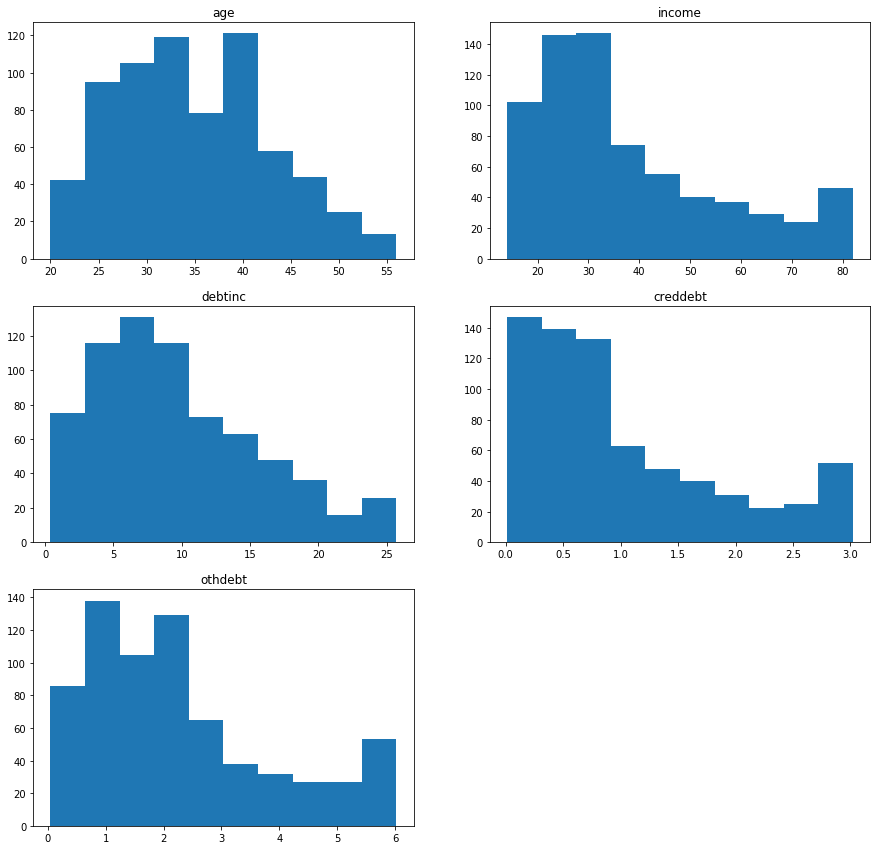

In [28]:
#lets check the distribution of mumeric contineous variables
mlp.figure(figsize=(15 , 20))
for i in range(len(cnames)):
    mlp.subplot(4,2,i+1)
    mlp.hist(data[cnames[i]])
    mlp.title(cnames[i])

From the distribution we can see that all numeric variables are in right skewd distribution

In [30]:
#Lets normalise the data
for i in cnames:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

age
income
debtinc
creddebt
othdebt


In [31]:
data.to_csv("Pre_processed_data.csv")

In [32]:
data_p = data.copy()

In [33]:
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.583333,3,17,12,0.294118,0.351779,0.280131,0.830475,1.0
1,0.194444,1,10,6,0.250000,0.667984,0.448685,0.661836,0.0
2,0.555556,1,15,14,0.602941,0.201581,0.280532,0.355304,0.0
3,0.583333,1,15,14,0.294118,0.098814,0.879433,0.129799,0.0
4,0.111111,2,2,0,0.205882,0.667984,0.589962,0.503835,1.0
...,...,...,...,...,...,...,...,...,...
695,0.444444,2,6,15,0.191176,0.166008,0.083180,0.156348,1.0
696,0.250000,2,6,4,0.102941,0.438735,0.118873,0.334652,0.0
697,0.361111,1,15,3,0.264706,0.284585,0.159329,0.317121,0.0
698,0.694444,1,19,22,0.926471,0.316206,0.761120,0.689378,0.0


# Logistic regression Model

In [34]:
data_p.dtypes

age          float64
ed          category
employ      category
address     category
income       float64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score ,recall_score



Lets create Dummy variables for all the Categorical variables

In [36]:
cat_vars=['ed' , 'employ' , 'address']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_p[var], prefix=var)
    data1=data_p.join(cat_list)
    data_p=data1
    
cat_vars=['ed' , 'employ' , 'address']
data_vars=data_p.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data_p[to_keep]
data_final.columns.values

array(['age', 'income', 'debtinc', 'creddebt', 'othdebt', 'default',
       'ed_1', 'ed_2', 'ed_3', 'ed_4', 'ed_5', 'employ_0', 'employ_1',
       'employ_2', 'employ_3', 'employ_4', 'employ_5', 'employ_6',
       'employ_7', 'employ_8', 'employ_9', 'employ_10', 'employ_11',
       'employ_12', 'employ_13', 'employ_14', 'employ_15', 'employ_16',
       'employ_17', 'employ_18', 'employ_19', 'employ_20', 'employ_21',
       'employ_22', 'employ_23', 'employ_24', 'employ_25', 'employ_26',
       'employ_27', 'employ_28', 'employ_29', 'employ_30', 'employ_31',
       'employ_33', 'address_0', 'address_1', 'address_2', 'address_3',
       'address_4', 'address_5', 'address_6', 'address_7', 'address_8',
       'address_9', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16',
       'address_17', 'address_18', 'address_19', 'address_20',
       'address_21', 'address_22', 'address_23', 'address_24',
       'address_25', 'address_26', 'addre

In [37]:
data

,age,income,debtinc,creddebt,othdebt,default,ed_1,ed_2,ed_3,ed_4,...,address_22,address_23,address_24,address_25,address_26,address_27,address_29,address_30,address_31,address_34
0,0.583333,0.294118,0.351779,0.280131,0.830475,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.194444,0.250000,0.667984,0.448685,0.661836,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.555556,0.602941,0.201581,0.280532,0.355304,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.583333,0.294118,0.098814,0.879433,0.129799,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.111111,0.205882,0.667984,0.589962,0.503835,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.444444,0.191176,0.166008,0.083180,0.156348,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0.250000,0.102941,0.438735,0.118873,0.334652,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0.361111,0.264706,0.284585,0.159329,0.317121,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0.694444,0.926471,0.316206,0.761120,0.689378,0.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Now there are 76 attributes availble and we cannot use all 76 attributes since they increse the complexity of the variable.

We are selecting only 30 significant features out of all the 76 attributes.for that we use feature importance function

In [38]:
X_train , X_test , y_train , y_test = train_test_split(data_final.drop('default' , axis = 1),
                                                       data_final['default'], test_size = 0.2 , 
                                                       random_state = 200)

In [39]:
from sklearn.ensemble import ExtraTreesRegressor

In [40]:
model = ExtraTreesRegressor()

In [41]:
model.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [42]:
model.feature_importances_

array([5.52331146e-02, 6.74182260e-02, 1.48567732e-01, 6.54453880e-02,
       5.10005243e-02, 2.47058120e-02, 2.44596597e-02, 3.55812660e-02,
       1.20236621e-02, 9.97211124e-04, 4.48109274e-02, 2.19301686e-02,
       3.84428823e-02, 1.95590556e-02, 1.70694601e-02, 1.07536437e-02,
       1.22336218e-02, 1.00913043e-02, 2.09531422e-03, 8.01458496e-03,
       8.30257166e-03, 3.94808236e-03, 3.97690000e-03, 1.21864488e-02,
       7.16524456e-03, 8.25635581e-04, 2.72169975e-03, 1.43305636e-03,
       3.44398507e-03, 2.50366573e-03, 3.95125729e-05, 3.26750631e-03,
       4.16816256e-04, 0.00000000e+00, 6.63811225e-05, 2.36021769e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.67627668e-03, 0.00000000e+00, 2.24382484e-02,
       1.85700660e-02, 2.31958401e-02, 3.12443828e-02, 1.46804686e-02,
       1.01444571e-02, 2.09366531e-02, 1.43666060e-02, 1.56381798e-02,
       8.30727340e-03, 1.43866409e-02, 1.35782989e-02, 7.56087582e-03,
      

In [43]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

In [95]:
feat_importances

age           0.055233
income        0.067418
debtinc       0.148568
creddebt      0.065445
othdebt       0.051001
                ...   
address_27    0.000763
address_29    0.000576
address_30    0.000000
address_31    0.000000
address_34    0.000000
Length: 75, dtype: float64

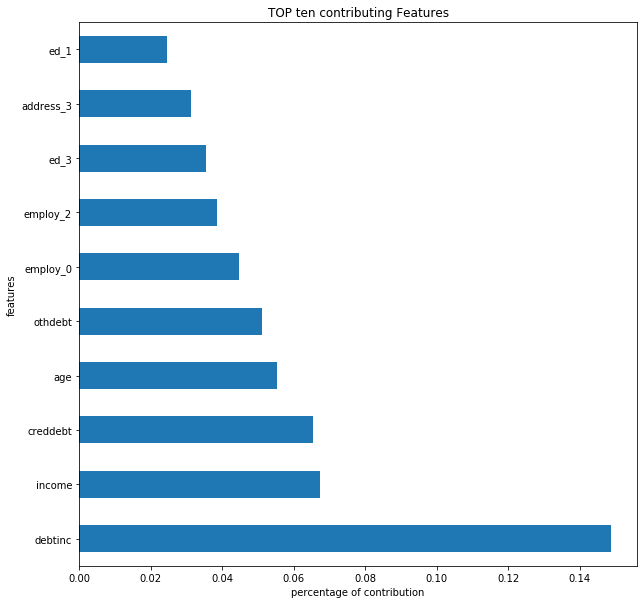

In [44]:
mlp.figure(figsize=(10,10))
feat_importances.nlargest(10).plot(kind='barh')
mlp.xlabel("percentage of contribution")
mlp.ylabel("features")
mlp.title("TOP ten contributing Features")
mlp.show()

In [45]:
col=pd.DataFrame(feat_importances.nlargest(30))
col = col.reset_index()
col = col.rename(columns= {'index' : 'features'})
rows = col['features'].values.tolist()
rows

['debtinc',
 'income',
 'creddebt',
 'age',
 'othdebt',
 'employ_0',
 'employ_2',
 'ed_3',
 'address_3',
 'ed_1',
 'ed_2',
 'address_2',
 'address_0',
 'employ_1',
 'address_6',
 'employ_3',
 'address_1',
 'employ_4',
 'address_8',
 'address_4',
 'address_10',
 'address_7',
 'address_11',
 'address_18',
 'employ_6',
 'employ_13',
 'ed_4',
 'employ_5',
 'address_5',
 'employ_7']

In [46]:
X_Final = data_p[rows]

So now we have created a final data set having only 30 significant features.

In [47]:
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X_Final,
                                                       data_p['default'], test_size = 0.2 , 
                                                       random_state = 200)

In [48]:
print(X_train1.shape , 
      X_test1.shape , 
      y_train1.shape ,
      y_test1.shape)

(560, 30) (140, 30) (560,) (140,)


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train1 , y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression()

In [51]:
y_predict = LogReg.predict(X_test1)

In [52]:
y_predict

array([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0.])

# Model Evaluation
Classification report without cross-validation

In [53]:
print(classification_report(y_test1 , y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       114
         1.0       0.59      0.38      0.47        26

    accuracy                           0.84       140
   macro avg       0.73      0.66      0.68       140
weighted avg       0.82      0.84      0.82       140



In [54]:
LogReg.score(X_test1, y_test1)

0.8357142857142857

K-fold cross-validation & confusion matrices

In [55]:
Score= cross_val_score(LogReg , X_train1 , y_train1 ,cv=5)
Score
Score.mean()

0.7678571428571429

In [56]:
CM = pd.crosstab(y_test1 , y_predict)
CM

col_0,0.0,1.0
default,,
0.0,107,7
1.0,16,10


In [57]:
TP = CM.iloc[1,1]
TN = CM.iloc[0,0]
FP = CM.iloc[0,1]
FN = CM.iloc[1,0]

Classification Accuracy: Overall, how often is the classifier correct?    

In [58]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test1, y_predict))

0.8357142857142857
0.8357142857142857


#sensitivity or recall score or true positive rate
#When the actual value is positive, how often is the prediction correct?

In [59]:
print(TP / (TP+FN))

print(recall_score(y_test1 , y_predict))

0.38461538461538464
0.38461538461538464




Specificity: When the actual value is negative, how often is the prediction correct?

    How "specific" (or "selective") is the classifier in predicting positive instances?



In [60]:
print(TN / float(TN + FP))

0.9385964912280702


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?


In [61]:
print(FP / float(TN + FP))

0.06140350877192982




Precision: When a positive value is predicted, how often is the prediction correct?

    How "precise" is the classifier when predicting positive instances?



In [62]:


print(TP / float(TP + FP))
print(metrics.precision_score(y_test1, y_predict))



0.5882352941176471
0.5882352941176471


our business objective is to increase the sensitivity of the model 

i.e When the actual value is positive, how often is the prediction correct

currently sensitivity of the model is 38% , means chances of chances of predicting default customer is very less.



 Lets adjust the classification threshHold to see how sensitivity changes with the thresh hold.

In [63]:
LogReg.predict_proba(X_test1)[0:10 , 1]

array([0.36705378, 0.54381335, 0.57160043, 0.39400815, 0.22336903,
       0.20365143, 0.17375037, 0.57665227, 0.20517058, 0.81494162])

In [64]:
# store the predicted probabilities for class 1

y_pred_prob  = LogReg.predict_proba(X_test1)[: , 1]

In [65]:
%matplotlib inline
import matplotlib.pyplot as mlp

Text(0, 0.5, 'Frequency')

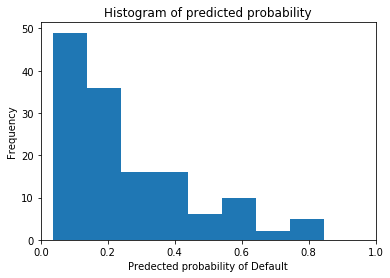

In [66]:
mlp.hist(y_pred_prob , bins=8)
mlp.xlim(0,1)
mlp.title("Histogram of predicted probability")
mlp.xlabel("Predected probability of Default")
mlp.ylabel("Frequency")

In [67]:
#Decrease the threshold for predicting Default in order to increase the sensitivity of the classifier

In [68]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob] ,0.20)[0]

In [69]:
# lets compare confusion matrix for old and new thresh hold limits
print(CM) # old


col_0    0.0  1.0
default          
0.0      107    7
1.0       16   10


In [70]:
print(confusion_matrix(y_test1, y_pred_class))

[[73 41]
 [ 4 22]]


In [71]:
# we can see that TP counts have been increased now.
# lets calcultae the sensitivity or recall value

print(21/(21+5))
print(recall_score(y_test1 ,y_pred_class))

0.8076923076923077
0.8461538461538461


In [72]:
#Our sensitivity has been increased from (42% to 92%)

In [73]:
print(classification_report(y_test1 , y_pred_class))

              precision    recall  f1-score   support

         0.0       0.95      0.64      0.76       114
         1.0       0.35      0.85      0.49        26

    accuracy                           0.68       140
   macro avg       0.65      0.74      0.63       140
weighted avg       0.84      0.68      0.71       140



In [74]:
#Lets calculate the accuracy of our model if we keep the thresh hold level to 0.3

print((81+21)/ (81+21+5+33))



0.7285714285714285


At the loss of 9% of accuracy our sensitivity or recall has been increased from 38% to 92%

# ROC-AUC curve



    ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
    You can't actually see the thresholds used to generate the curve on the ROC curve itself



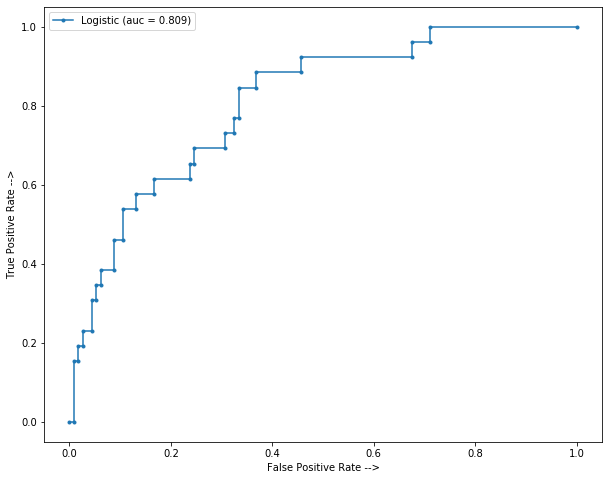

In [75]:
from sklearn.metrics import roc_curve ,auc

l_fpr , l_tpr , threshhold = roc_curve(y_test1 , y_pred_prob)
L_auc = auc(l_fpr ,l_tpr)


mlp.figure(figsize=(10,8))
mlp.plot(l_fpr ,l_tpr , marker='.', label='Logistic (auc = %0.3f)' % L_auc)
mlp.xlabel('False Positive Rate -->')
mlp.ylabel('True Positive Rate -->')

mlp.legend()
mlp.show()